# 聚类评估方法汇总

In [1]:
data = [['Budweiser', 144, 15, 4.7, 0.43],
 ['Schlitz', 151, 19, 4.9, 0.43],
 ['Lowenbrau', 157, 15, 0.9, 0.48],
 ['Kronenbourg', 170, 7, 5.2, 0.73],
 ['Heineken', 152, 11, 5.0, 0.77],
 ['Old_Milwaukee', 145, 23, 4.6, 0.28],
 ['Augsberger', 175, 24, 5.5, 0.4],
 ['Srohs_Bohemian_Style', 149, 27, 4.7, 0.42],
 ['Miller_Lite', 99, 10, 4.3, 0.43],
 ['Budweiser_Light', 113, 8, 3.7, 0.4],
 ['Coors', 140, 18, 4.6, 0.44],
 ['Coors_Light', 102, 15, 4.1, 0.46],
 ['Michelob_Light', 135, 11, 4.2, 0.5],
 ['Becks', 150, 19, 4.7, 0.76],
 ['Kirin', 149, 6, 5.0, 0.79],
 ['Pabst_Extra_Light', 68, 15, 2.3, 0.38],
 ['Hamms', 139, 19, 4.4, 0.43],
 ['Heilemans_Old_Style', 144, 24, 4.9, 0.43],
 ['Olympia_Goled_Light', 72, 6, 2.9, 0.46],
 ['Schlitz_Light', 97, 7, 4.2, 0.47]]

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.DataFrame(data,columns=["name","calories","sodium","alcohol","cost"])
X = df[["calories","sodium","alcohol","cost"]]
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


### SSE(和方差)
该统计参数计算的是拟合数据和原始数据对应点的误差的平方和，计算公式如下  
 $\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}$ 
SSE越接近于0，说明模型选择和拟合更好，数据预测也越成功。

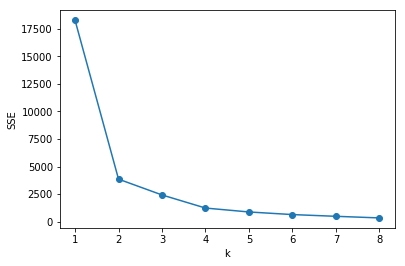

In [5]:
#断崖碎石图选取最优K值
import pandas as pd  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
'利用SSE选择k'  
SSE = []  # 存放每次结果的误差平方和  
for k in range(1,9):  
    estimator = KMeans(n_clusters=k)  # 构造聚类器  
    estimator.fit(df[['calories','sodium','alcohol','cost']])  
    SSE.append(estimator.inertia_)  
N = range(1,9)  
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(N,SSE,'o-')  
plt.show() 

#### 轮廓系数（Silhouette Coefficient ）

$s(i) = \frac{(b(i)-a(i))}{max\{a(i),b(i)\}}$  
$s(i) = \begin{Bmatrix}1-\frac{a(i)}{b(i)},a(i)<b(i)\\\\0,a(i)=b(i)\\\\\frac{b(i)}{a(i)}-1,a(i)>b(i)\end{Bmatrix}$
- 计算样本i到同簇其他样本的平均距离a(i)。a(i)越小，说明样本i越应该被聚类到该簇。将a(i)称为样本i的簇内不相似度。  
- 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}  
* si接近1，则说明样本i聚类合理
* si接近-1，则说明样本i更应该分类到另外的簇
* 若si 近似为0，则说明样本i在两个簇的边界上。

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append((k,score))
scores = pd.DataFrame(scores,columns=["lables","score"])
scores.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
lables,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.00000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000
score,0.691766,0.673178,0.585704,0.422549,0.455918,0.437761,0.389463,0.387476,0.39157,0.412826,0.345978,0.312214,0.307078,0.318346,0.284951,0.234981,0.158809,0.084231


Text(0,0.5,'Sihouette Score')

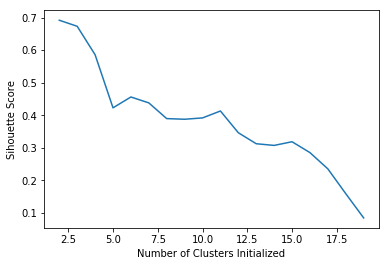

In [7]:
import matplotlib.pyplot as plt  
plt.plot(list(range(2,20)), scores.score)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

####  调整兰德系数（Adjusted Rand index）  

兰德系数（Rand index）需要给定实际类别信息C，假设K是聚类结果，a表示在C与K中都是同类别的元素对数，b表示在C与K中都是不同类别的元素对数  
$ARI =\frac{\sum{_i}{_j}(_{2}^{n{_i}{_j}})-[\sum{_i}(_{2}^{a{_i}})\sum{_j}(_{2}^{b{_i}})]/(_{2}^{n})}{\frac12[\sum{_i}(_{2}^{a{_i}})+\sum{_j}(_{2}^{b{_i}})]-[\sum{_i}(_{2}^{a{_i}})\sum{_j}(_{2}^{b{_i}})]/(_{2}^{n})}$
* 优点：  
  1. 对任意数量的聚类中心和样本数，随机聚类的ARI都非常接近于0；  
  2. 取值在［－1，1］之间，负数代表结果不好，越接近于1越好；  
  3. 可用于聚类算法之间的比较
* 缺点：  
  1. ARI需要真实标签

In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics
#假定K=2为真实分类
labels2 = KMeans(n_clusters=2).fit(X).labels_
#使用K=3为预测分类
labels3 = KMeans(n_clusters=3).fit(X).labels_

metrics.adjusted_rand_score(labels2, labels3) 

0.9154804270462633

####   互信息（Mutual Information based scores）  
互信息（Mutual Information）也是用来衡量两个数据分布的吻合程度。假设U与V是对N个样本标签的分配情况，则两种分布的熵（熵表示的是不确定程度）
利用基于互信息的方法来衡量聚类效果需要实际类别信息，MI与NMI取值范围为[0,1]，AMI取值范围为[-1,1]，它们都是值越大意味着聚类结果与真实情况越吻合。   
$AMI=\frac{MI-E[MI]}{max(H(U),H(V))-E[MI]}$
* 优点：  
  除取值范围在［0，1］之间，其他同ARI，可用于聚类模型选择；
* 缺点：  
  需要先验知识。

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
#假定K=2为真实分类
labels2 = KMeans(n_clusters=2).fit(X).labels_
#使用K=3为预测分类
labels3 = KMeans(n_clusters=3).fit(X).labels_

metrics.adjusted_mutual_info_score(labels2, labels3) 

0.7410165241059806

####  Homogeneity, completeness and V-measure
同质性homogeneity：每个群集只包含单个类的成员。   
完整性completeness：给定类的所有成员都分配给同一个群集。

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
#假定K=2为真实分类
labels2 = KMeans(n_clusters=2).fit(X).labels_
#使用K=3为预测分类
labels3 = KMeans(n_clusters=3).fit(X).labels_

print(metrics.homogeneity_score(labels2, labels3))
print(metrics.completeness_score(labels2, labels3))
#两者的调和平均V-measure
print(metrics.v_measure_score(labels2, labels3))

1.0
0.7618485505445785
0.8648286486475752


#### Fowlkes-Mallows scores  
FMI定义为两两精度和召回率的几何平均值  
$FMI = \frac{TP}{\sqrt{(TP+FP)(TP+FN)}}$

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
#假定K=2为真实分类
labels2 = KMeans(n_clusters=2).fit(X).labels_
#使用K=3为预测分类
labels3 = KMeans(n_clusters=3).fit(X).labels_

metrics.fowlkes_mallows_score(labels2, labels3)

0.9615239476408232

#### Calinski-Harabaz Index
类别内部数据的协方差越小越好，类别之间的协方差越大越好，这样的Calinski-Harabasz分数会高。    
在真实的分群label不知道的情况下，可以作为评估模型的一个指标。   
同时，数值越小可以理解为：组间协方差很小，组与组之间界限不明显。   
与轮廓系数的对比，最大的优势：快！相差几百倍！毫秒级。  
$s(k)=\frac{tr(B_k)}{tr(W_k)}\frac{m-k}{k-1}$  
m为训练样本数，k是类别个数，$B_k$是类别之间协方差矩阵，$W_k$是类别内部数据协方差矩阵，tr为矩阵的迹

In [12]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.calinski_harabaz_score(X, labels)
    scores.append((k,score))
scores = pd.DataFrame(scores,columns=["lables","score"])
scores.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
lables,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.00000,10.000000,11.000000,12.000000,13.00000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000
score,67.182349,55.475789,73.288695,72.464314,76.215889,78.566092,89.141699,94.06643,93.646362,103.602828,121.888652,152.72172,175.851258,249.111196,531.834374,1292.191074,1347.956556,1766.928003


Text(0,0.5,'Sihouette Score')

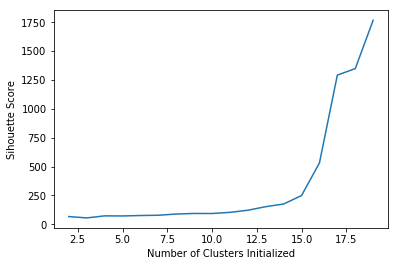

In [13]:
import matplotlib.pyplot as plt  
plt.plot(list(range(2,20)), scores.score)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")